In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

df = pd.read_csv("/kaggle/input/churn-predictions-personal/Churn_Predictions.csv", index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 13)

In [6]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15591167.10,15628528.25,1.569074e+07,1.575323e+07,1.579083e+07,1.580303e+07,1.581311e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,521.00,584.00,6.520000e+02,7.180000e+02,7.780000e+02,8.120000e+02,8.500000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,27.00,32.00,3.700000e+01,4.400000e+01,5.300000e+01,6.000000e+01,7.200000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,1.00,3.00,5.000000e+00,7.000000e+00,9.000000e+00,9.000000e+00,1.000000e+01,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,0.00,9.719854e+04,1.276442e+05,1.492448e+05,1.627117e+05,1.859680e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,0.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,20273.58,51002.11,1.001939e+05,1.493882e+05,1.796747e+05,1.901554e+05,1.980697e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00


In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", progress_bar=False)
profile.to_widgets()

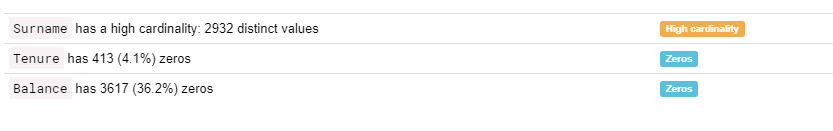

In [8]:
df.shape

(10000, 13)

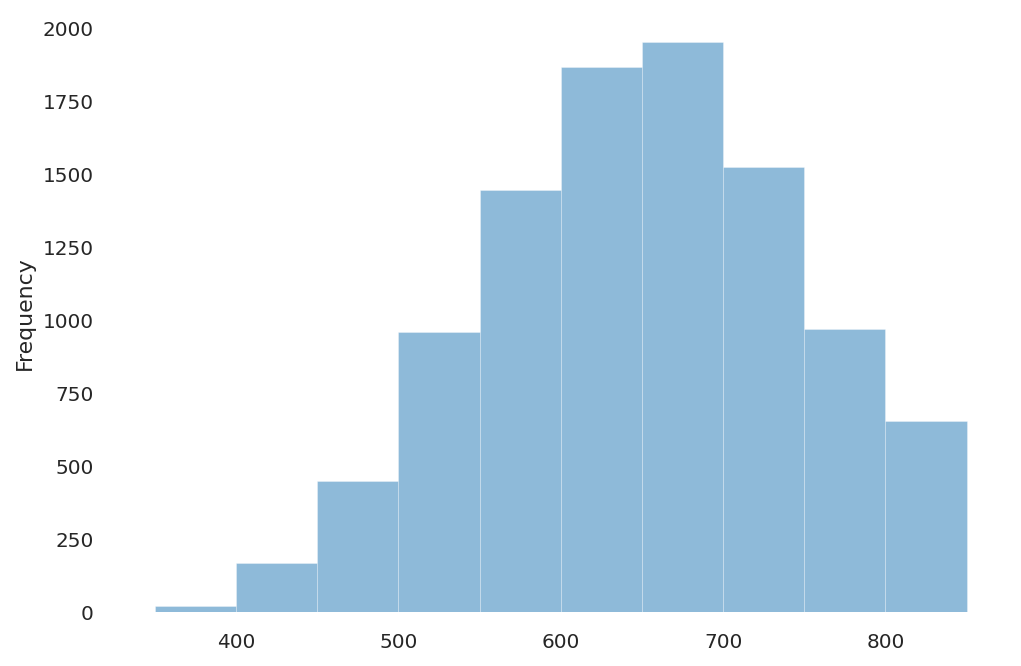

In [9]:
df["CreditScore"].plot.hist(bins=10, alpha=0.5)

In [10]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.groupby(["Geography","Gender","Exited"]).agg({"Exited":"count"})

Exited
Geography Gender Exited        
France    Female 0         1801
                 1          460
          Male   0         2403
                 1          350
Germany   Female 0          745
                 1          448
          Male   0          950
                 1          366
Spain     Female 0          858
                 1          231
          Male   0         1206
                 1          182

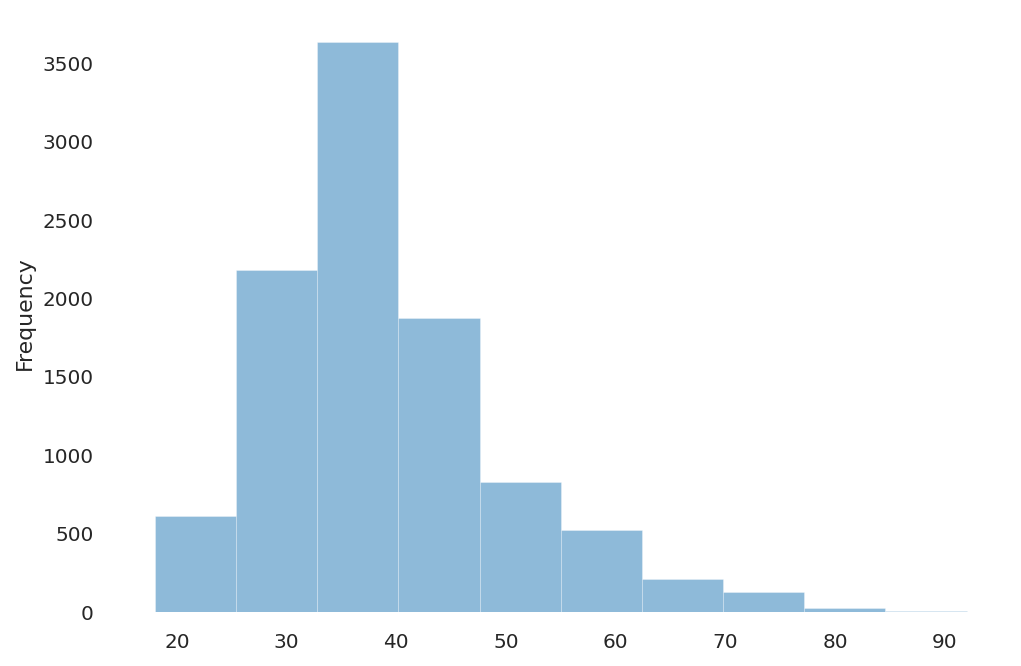

In [13]:
df["Age"].plot.hist(bins=10, alpha=0.5)

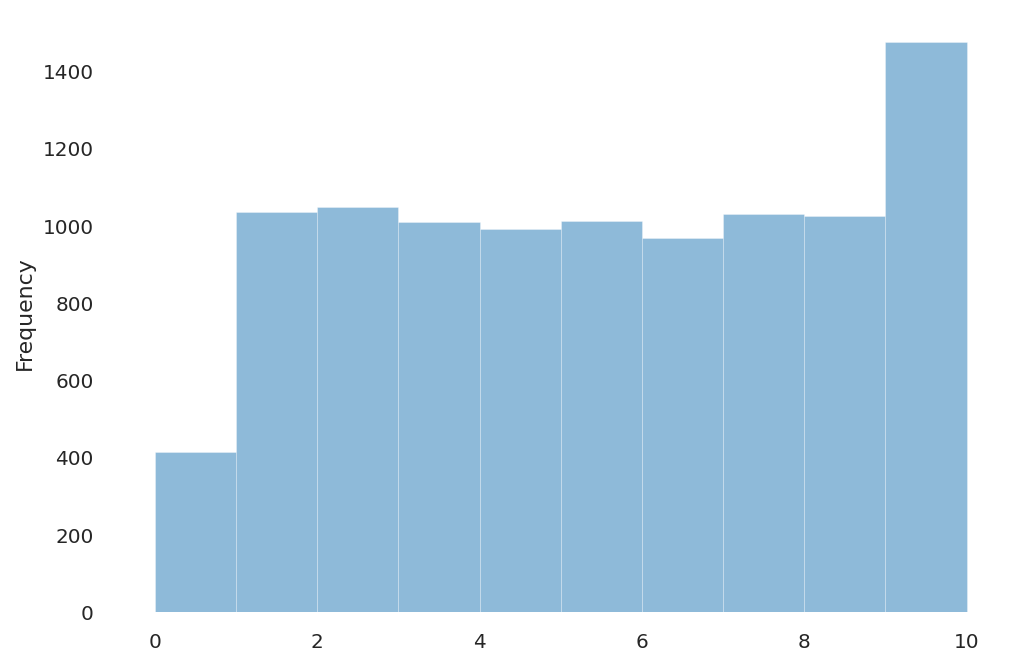

In [14]:
df["Tenure"].plot.hist(bins=10, alpha=0.5)

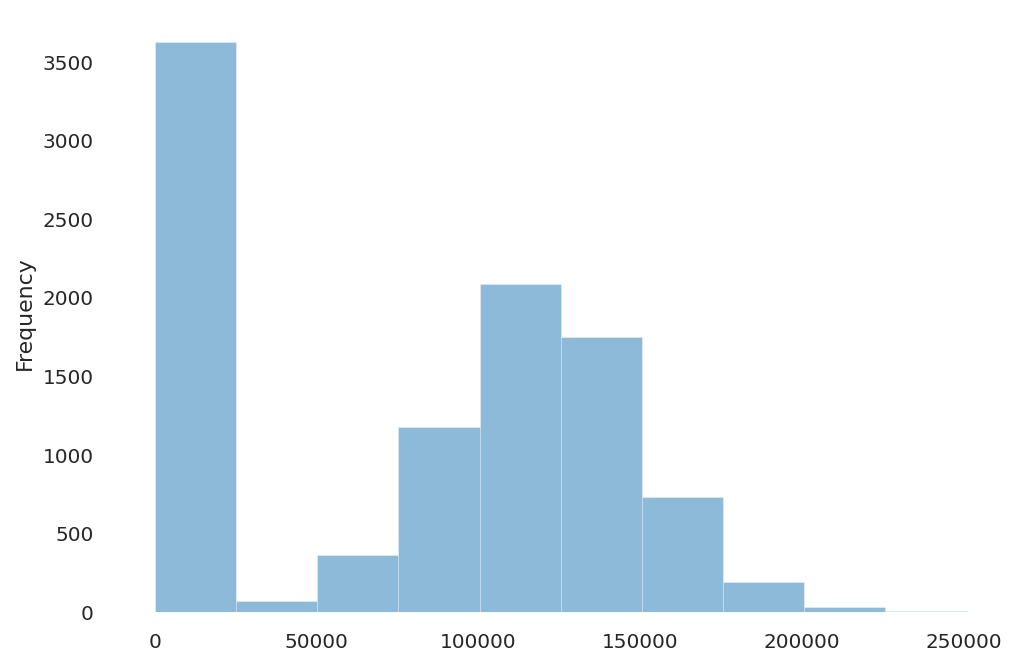

In [15]:
df["Balance"].plot.hist(bins=10, alpha=0.5)

In [16]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [17]:
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [18]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

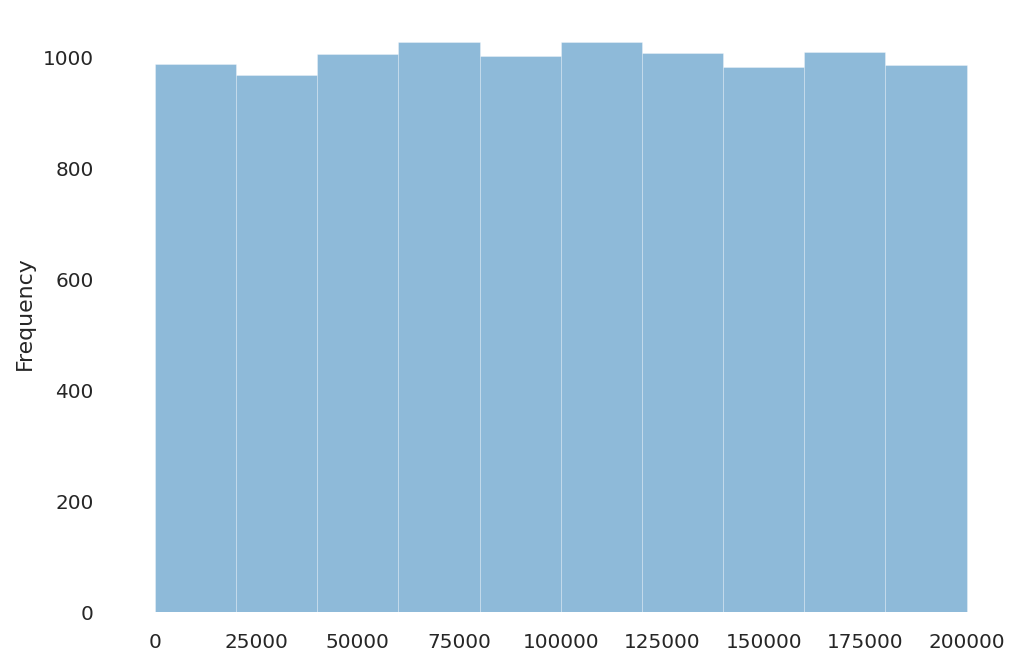

In [19]:
df["EstimatedSalary"].plot.hist(bins=10, alpha=0.5)

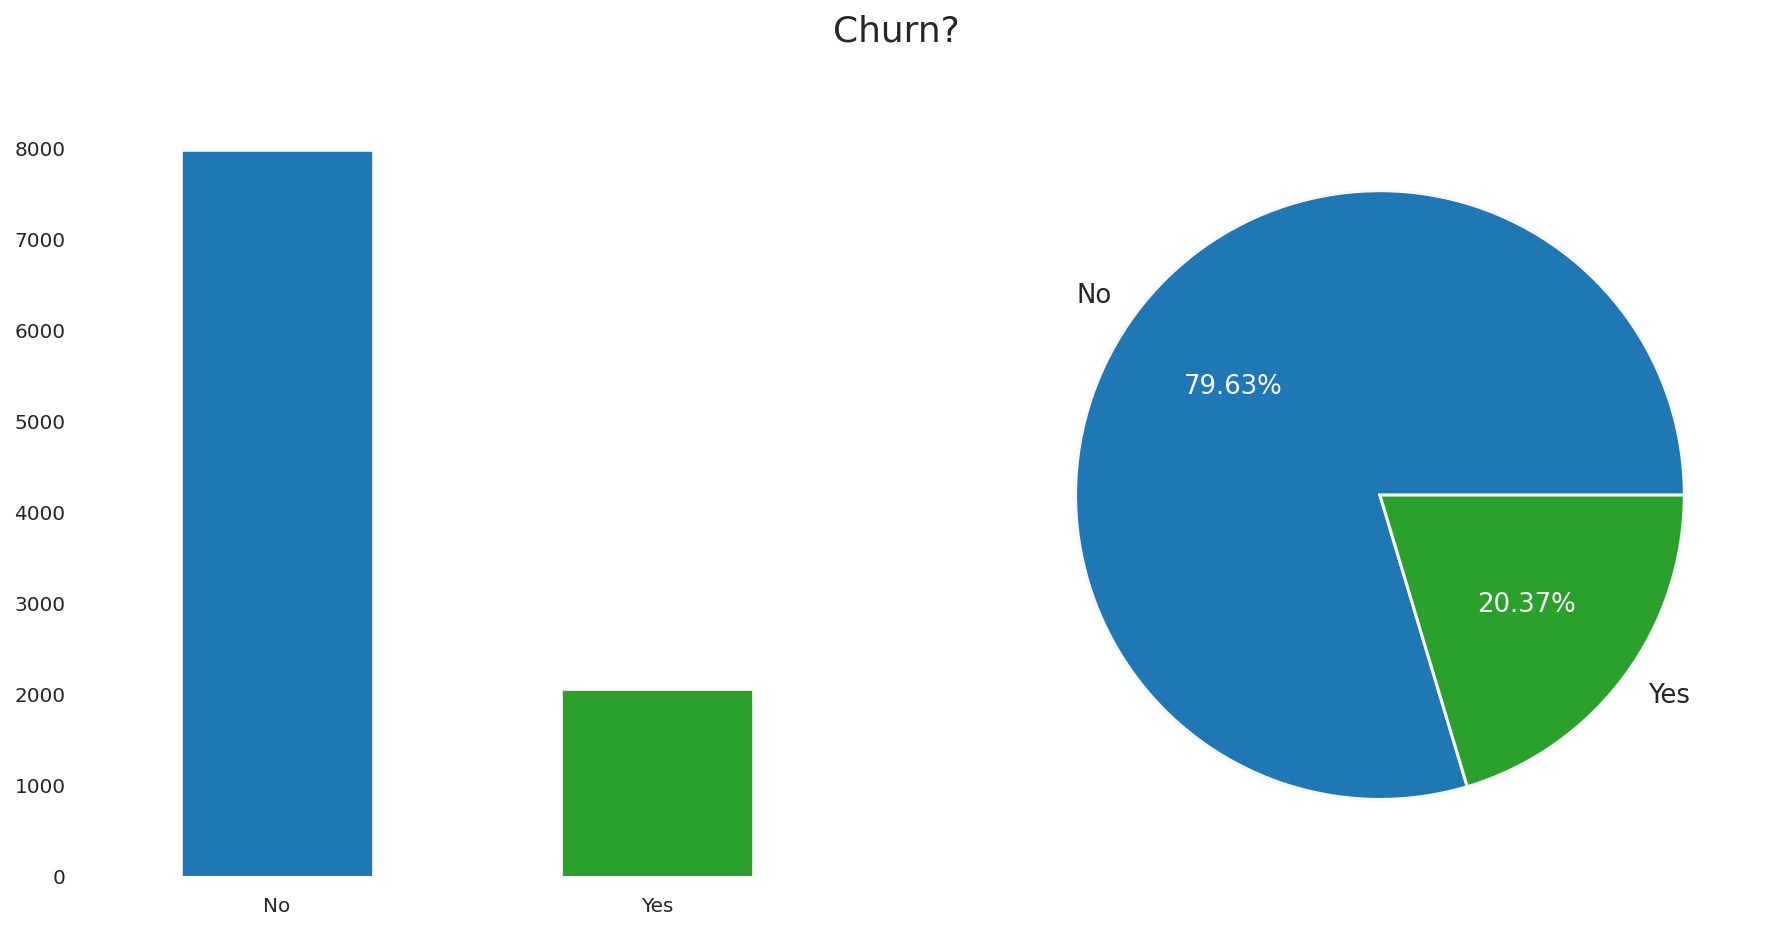

In [20]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Churn?", fontsize = 18.)
_ = df.Exited.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Exited.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

# Data Preprocessing

In [21]:
df.drop(["CustomerId", "Surname"], axis = 1, inplace = True)

In [22]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
for feature in df.select_dtypes(include=['float',"int"]):
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Age no
Tenure no
Balance no
NumOfProducts yes
HasCrCard no
IsActiveMember no
EstimatedSalary no
Exited no


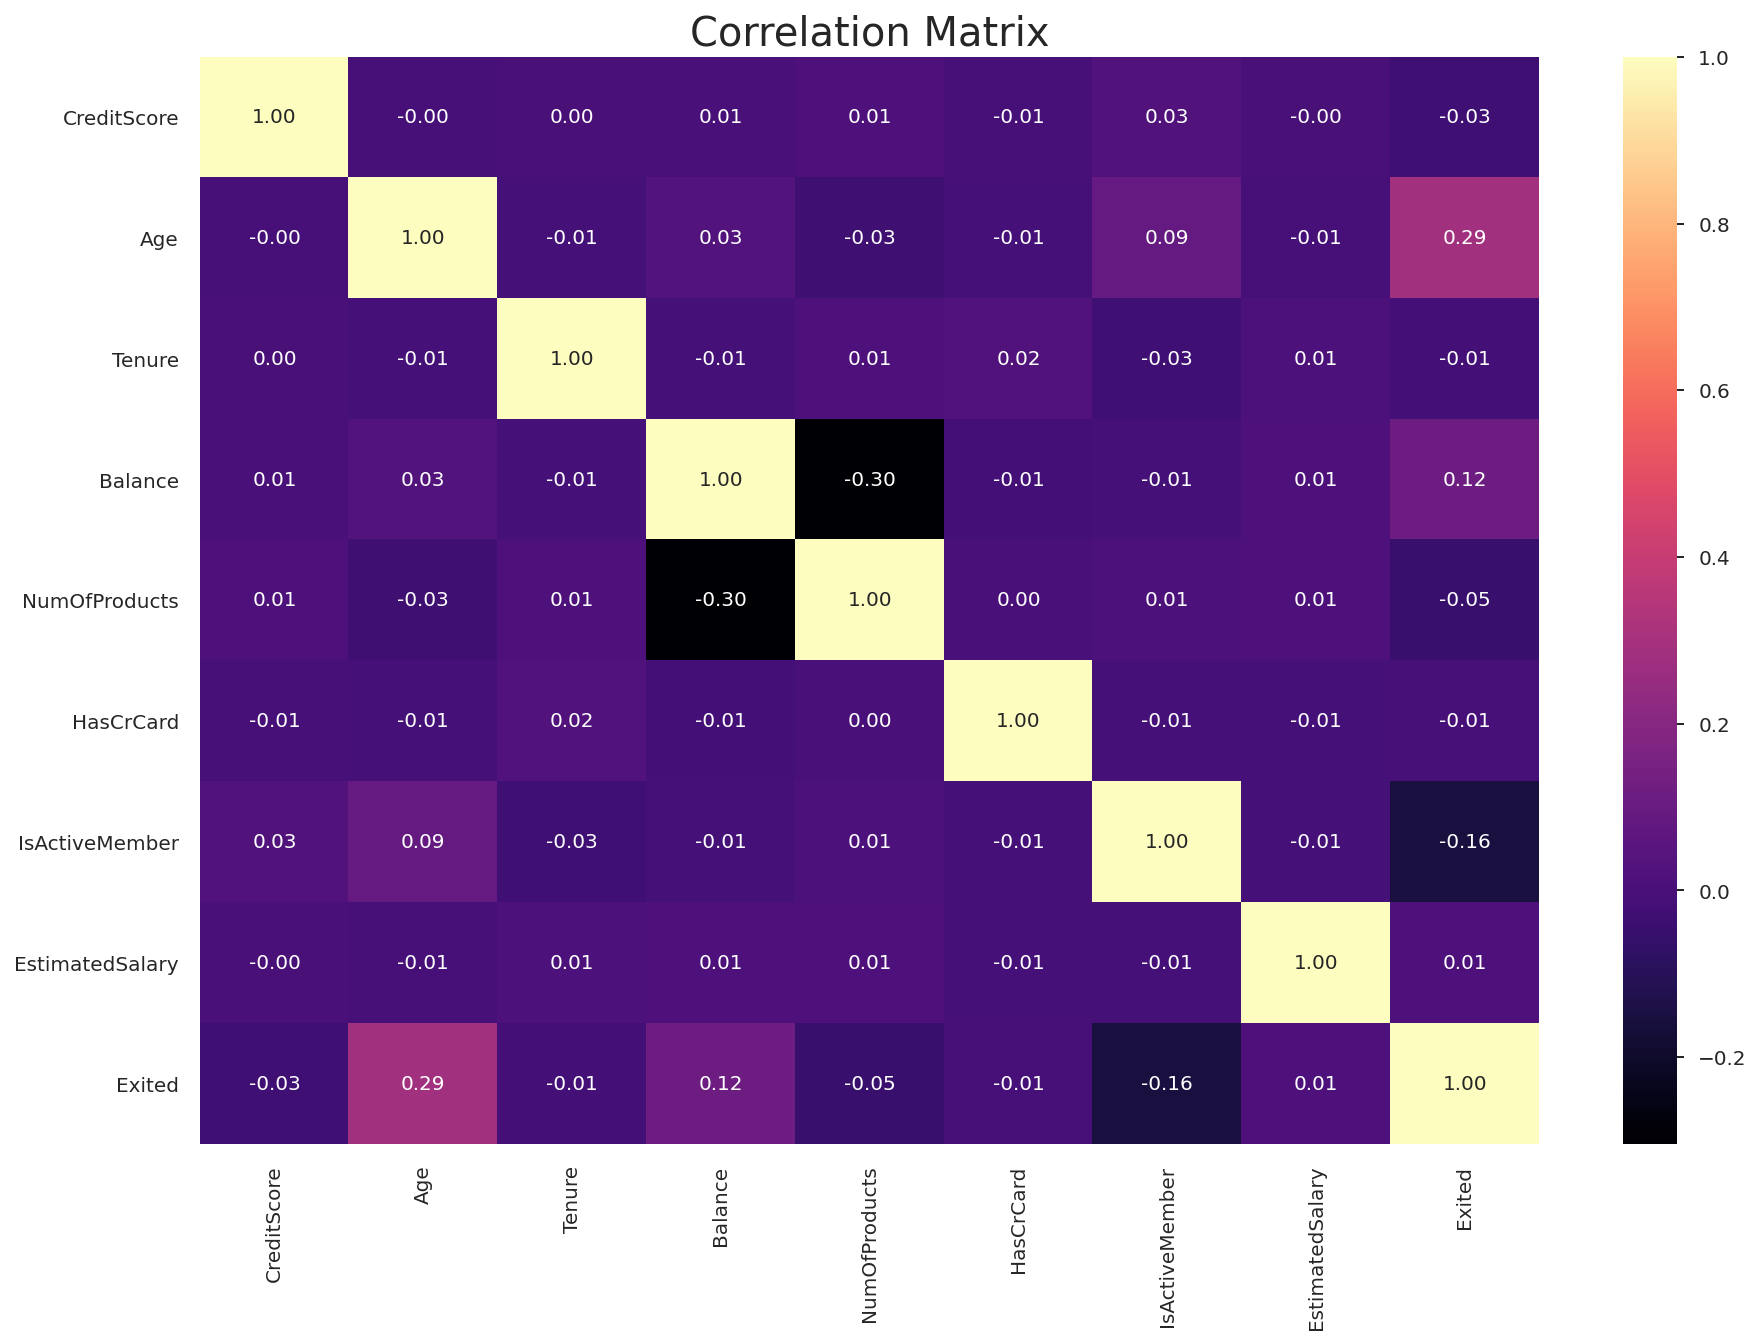

In [24]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [25]:
df.groupby(["NumOfProducts","Exited"]).agg({"Exited":"count"})

Exited
NumOfProducts Exited        
1             0         3675
              1         1409
2             0         4242
              1          348
3             0           46
              1          220
4             1           60

In [26]:
cat_df = df[["Geography","Gender"]]

In [27]:
bool_df = df[["IsActiveMember","HasCrCard"]]

In [28]:
df.drop(["IsActiveMember","HasCrCard","Geography","Gender"], axis = 1, inplace = True)

In [29]:
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [30]:
y = df["Exited"]
X = df.drop(["Exited"], axis = 1)
cols = X.columns
index = X.index

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols,index=index)
X = pd.concat([X,bool_df,cat_df],axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)

In [33]:
#Dengesiz bir veri seti olduğu için örneklem sayısını arttıracağız
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
X_train, y_train = smk.fit_sample(X_train, y_train)

X_test, y_test = smk.fit_sample(X_test, y_test)

In [34]:
# Tum modellerin train validasyon skorları

models = []
models.append(('LR', LogisticRegression( random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models.append(('RF', RandomForestClassifier( random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models.append(("LightGBM", LGBMClassifier( random_state = 12345)))

# evaluate each model in turn
results = []
names = []

In [35]:
for name, model in models:
    
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        results.append(acc_score)
        names.append(name)
        msg = "%s: %f" % (name, acc_score)
        print(msg)

LR: 0.736590
KNN: 0.736271
CART: 0.762771
RF: 0.797573
SVM: 0.802682
XGB: 0.860473
LightGBM: 0.892401


In [38]:
# Tum modellerin değişken önem düzeyleri

models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))

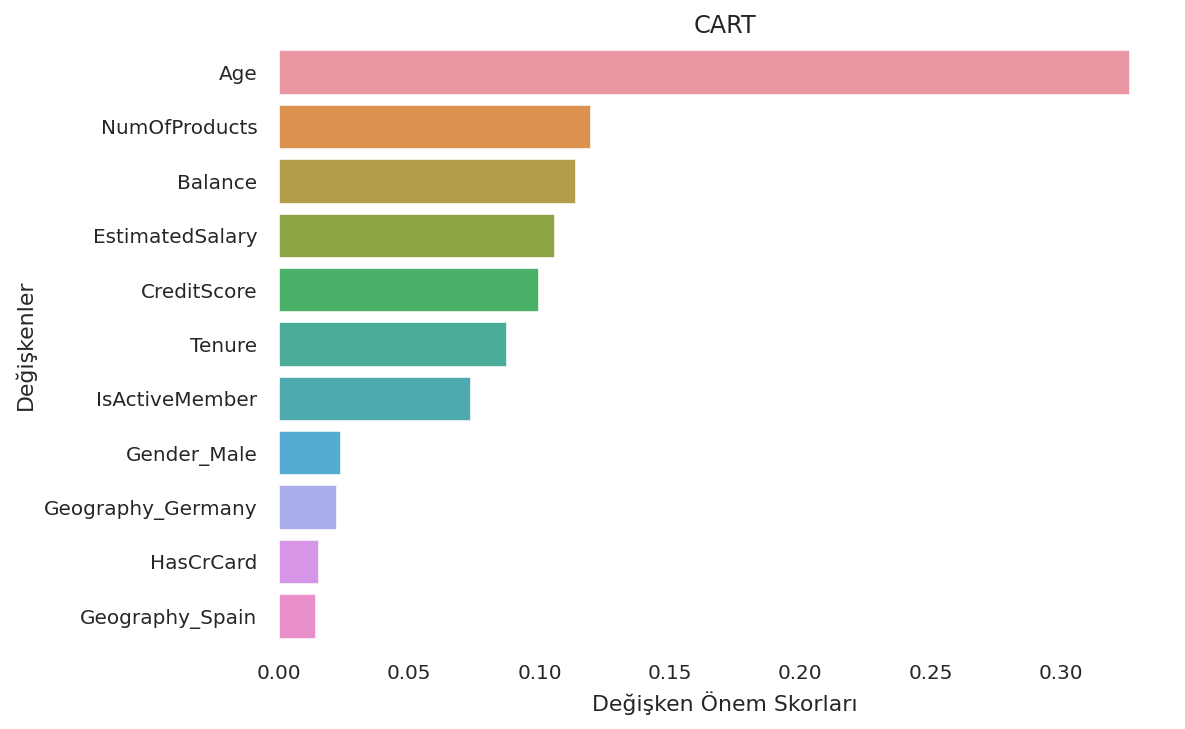

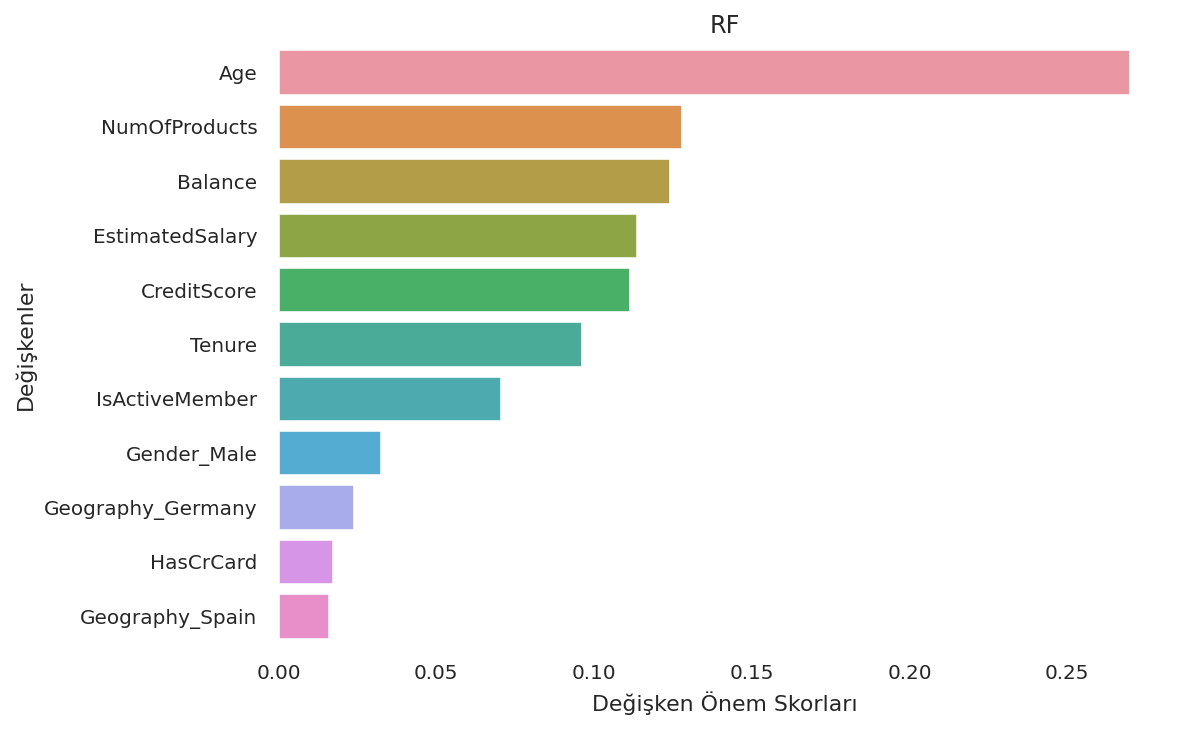

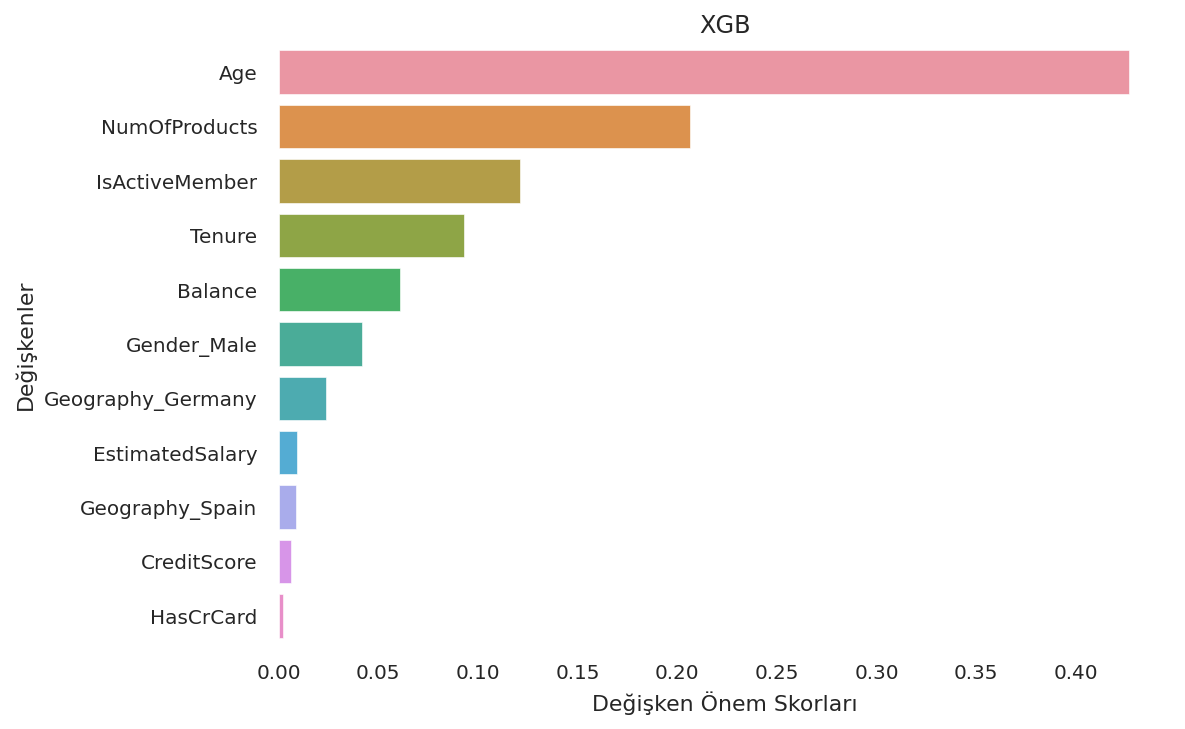

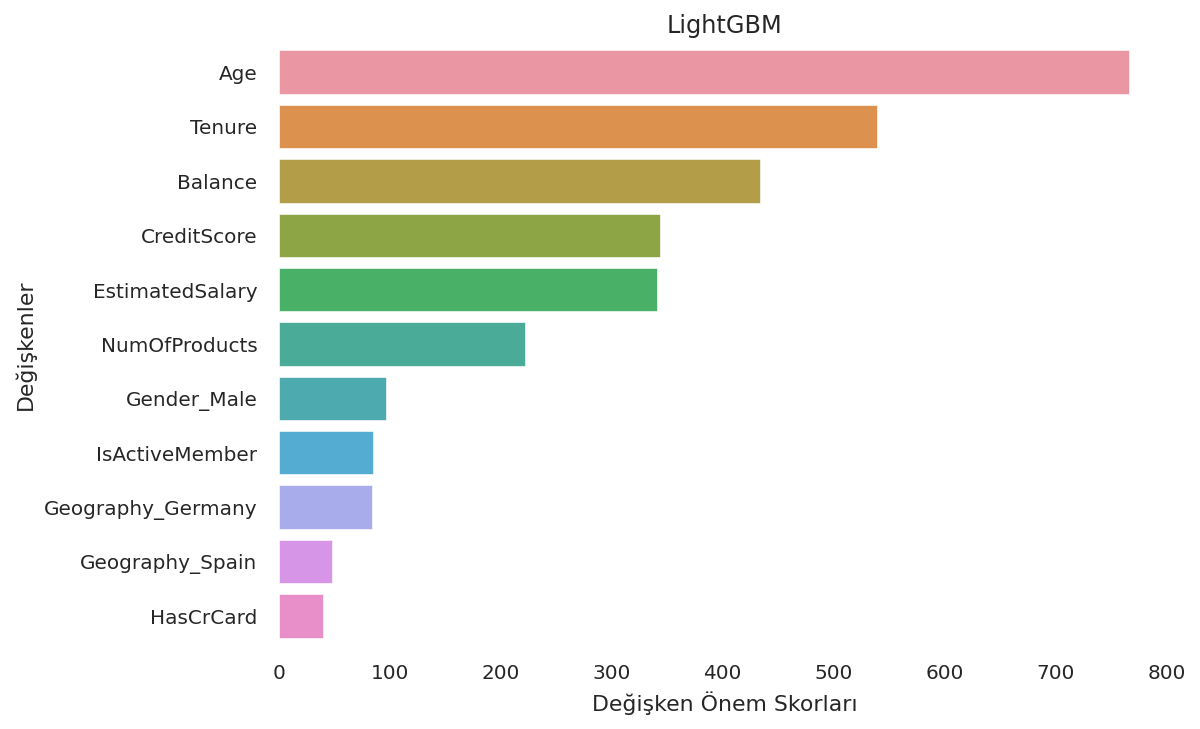

In [39]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

# Confusion Matrix

In [40]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

In [41]:
TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [42]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

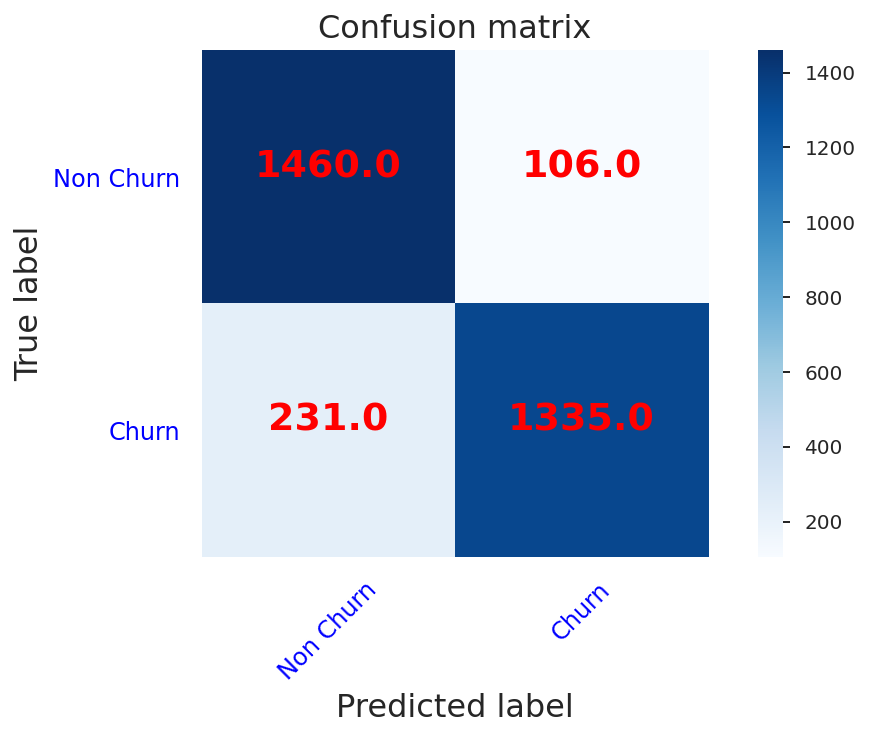

In [43]:
import itertools
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                      title='Confusion matrix')

In [44]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1460
False Positives:  106
False Negatives:  231
True Positives:  1335


In [45]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1

In [46]:
df_pred.head()

,y_test,y_pred
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [47]:
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predicts_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predicts_indexes.append(row.name)
df = df.copy()    

In [48]:
#gerçekte diyabet olmayan doğru non-diyabet tahminler
df.loc[TN_predicts_indexes,"tahmin_sonuc"] = "TN"
#gerçekte diyabet olan doğru tahmins
df.loc[TP_predicts_indexes,"tahmin_sonuc"] = "TP"
#gerçekte diyabet olamayan yanlış tahmins
df.loc[FP_predicts_indexes,"tahmin_sonuc"] = "FP"
#gerçekte diyabet olan ama yanlış teşhisler
df.loc[FN_predicts_indexes,"tahmin_sonuc"] = "FN"
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,tahmin_sonuc
RowNumber,,,,,,,,
1,619,42,2,0.00,1,101348.88,1,TN
2,608,41,1,83807.86,1,112542.58,0,TN
3,502,42,8,159660.80,3,113931.57,1,TN
4,699,39,1,0.00,2,93826.63,0,TN
5,850,43,2,125510.82,1,79084.10,0,TN
6,645,44,8,113755.78,2,149756.71,1,TN
7,822,50,7,0.00,2,10062.80,0,TN
8,376,29,4,115046.74,4,119346.88,1,FN
9,501,44,4,142051.07,2,74940.50,0,TN


# RF

In [49]:
rf_params = {"n_estimators" :[100,200,500], 
             "max_features": [3,5,8,], 
             "min_samples_split": [2,5,8],
            "max_depth": [3,5,8]}

rf_model = RandomForestClassifier(random_state = 12345)

gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X_train, y_train)

rf_tuned = RandomForestClassifier(**gs_cv.best_params_,random_state=12345)
rf_tuned = rf_tuned.fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 19.1min finished


0.8250319284802043


# XGBoost

In [50]:
xgb = GradientBoostingClassifier(random_state=12345)

xgb_params = {"n_estimators": [100, 500, 1000],
              "subsample" : [0.6, 0.8, 1.0],
              "max_depth" : [3, 4, 5],
              "learning_rate" : [0.1, 0.01, 0.05,],
              "min_samples_split" : [2, 5, 10]}

xgb_cv_model = GridSearchCV(xgb, 
                     xgb_params, 
                     cv = 5, 
                     n_jobs = -1, 
                     verbose = 2).fit(X_train,y_train)

xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_,random_state=12345)
xgb_tuned = xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 23.0min


KeyboardInterrupt: 

# LGBM

In [51]:
lgbm = LGBMClassifier(random_state = 12345)

lgbm_params = {"learning_rate": [0.01, 0.05, 0.1],
              "n_estimators": [100, 500, 1000],
              "max_depth":[3, 5, 8]}

gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X_train,y_train)

lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.1min finished


0.8924010217113666
